In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

mlp.style.use("ggplot")
%matplotlib inline

In [2]:
# Reading in the training and testing datasets
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

# Exploratory Data Analysis

In [3]:
# Looking at the head of the training data
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# Examining the datatypes for the columns in our training data and looking at null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Getting a percent of how much null data there is per column
round(train.isnull().sum() * 100 / len(train), 1)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

<AxesSubplot:>

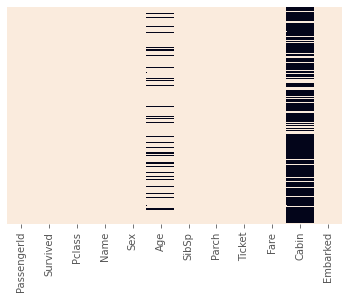

In [6]:
# Visualizing the number of missing values per column. May have to drop Cabin data or change to a more usable format due to large number of nulls
sns.heatmap(
    train.isnull(),
    yticklabels= False,
    cbar= False,
    cmap= "rocket_r"
)

Age  Cabin  Embarked  Fare  Name  Parch  PassengerId  Pclass  Sex  \
Survived                                                                      
0         424     68       549   549   549    549          549     549  549   
1         290    136       340   342   342    342          342     342  342   

          SibSp  Ticket  
Survived                 
0           549     549  
1           342     342

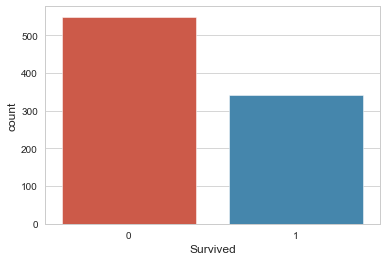

In [7]:
# Looking at how many people survived in the population
sns.set_style("whitegrid")
sns.countplot(x= "Survived", data= train)

train.pivot_table(
    index= "Survived",
    aggfunc= "count"
)

Survived
Sex             
female  0.742038
male    0.188908

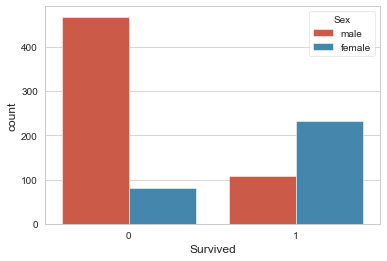

In [8]:
# Examining the survival data on males and females
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data= train)

train.pivot_table(
    values= "Survived",
    index= "Sex"
)

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

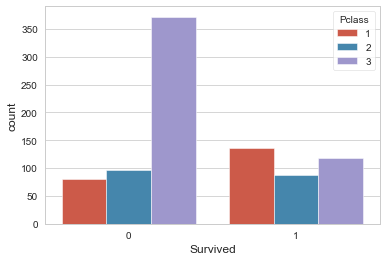

In [9]:
# Visually showing the survival rates by Pclass
sns.set_style("whitegrid")
sns.countplot(x= "Survived", hue= "Pclass", data= train)

train.pivot_table(
    values= "Survived",
    index= "Pclass"
)

<AxesSubplot:xlabel='Age'>

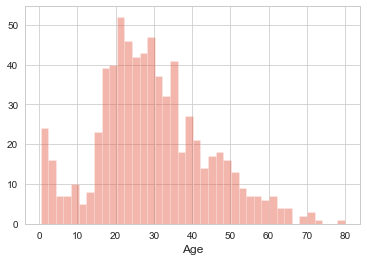

In [10]:
# Looking at distribution of the age
sns.distplot(train["Age"].dropna(), kde= False, bins= 40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

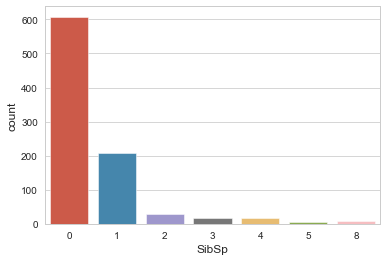

In [11]:
# Looking at the data distribution of population to see who had siblings and/or spouses
sns.countplot(x= "SibSp", data= train)

# Cleaning/Manipulating Data

In [12]:
# Using data imputation for the missing age rows (20%) - replacing null values with mean age value of population
train["Age"].fillna(train["Age"].mean(), inplace= True)
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# Imputation is not practical with Cabin data - too much is missing - so we will drop that column
train.drop(labels= "Cabin", axis= 1, inplace= True)
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


<AxesSubplot:>

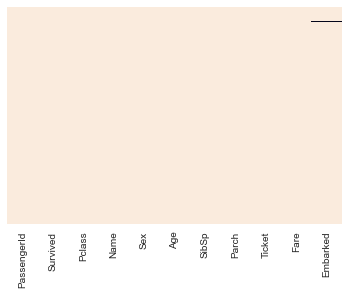

In [14]:
# Visualizing the number of missing values per column in training data after cleaning
sns.heatmap(
    train.isnull(),
    yticklabels= False,
    cbar= False,
    cmap= "rocket_r"
)

In [15]:
# Looking at our data after the changes
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [16]:
# Converting our categorical columns into binary values - first column is dropped as it is redundant (if not true then it must be the dropped value) and storing them as series
sex = pd.get_dummies(train["Sex"], drop_first= True)
embark = pd.get_dummies(train["Embarked"], drop_first= True).head()

In [17]:
# Dropping columns that we believe will not contribute to survival rates
train.drop(["Name", "Sex", "Ticket", "Embarked"], axis= 1, inplace= True)

In [18]:
# Looking at our DF after dropping columns
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [19]:
# Adding in our binary value columns to replace Age and Embark columns that were dropped
train = pd.concat([train, sex, embark], axis= 1)
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male    Q    S
0            1         0       3  22.0      1      0   7.2500     1  0.0  1.0
1            2         1       1  38.0      1      0  71.2833     0  0.0  0.0
2            3         1       3  26.0      0      0   7.9250     0  0.0  1.0
3            4         1       1  35.0      1      0  53.1000     0  0.0  1.0
4            5         0       3  35.0      0      0   8.0500     1  0.0  1.0

# Creating a Regression Model

In [20]:
# Determining dependent and independent variables and separating them. 
train.drop("Survived", axis= 1).head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  male    Q    S
0            1       3  22.0      1      0   7.2500     1  0.0  1.0
1            2       1  38.0      1      0  71.2833     0  0.0  0.0
2            3       3  26.0      0      0   7.9250     0  0.0  1.0
3            4       1  35.0      1      0  53.1000     0  0.0  1.0
4            5       3  35.0      0      0   8.0500     1  0.0  1.0